# Modelling Examples
#### In this notebook, we will train models with the "Deep FeedForward Neural Network" class which we have written from scratch. Then we will evaluate its performance and also compare it with builtin Deep Learning API tensforflow models.

## Libraries

In [26]:
from deep_feedforward_neural_network_model import DNN
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets, metrics, model_selection, preprocessing
from tensorflow.keras.datasets import mnist
# For comparing our Neural Network (NN) model with Keras NN models
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Softmax
from keras.utils import to_categorical

## Function to evaluate the model

In [2]:
def binary_dnn_model_results(model, X_train, Y_train, X_test, Y_test):
    
    print("DNN Model Results")
    
    # Learning Phase
    print("GRADIENT DESCENT CHECK")
    plt.plot(model.cost_during_training)
    plt.title("Cross Entropy Cost Value During Training")
    plt.xlabel("Iteration")
    plt.ylabel("Cross Entropy Cost")
    plt.show()
    
    # Accuracy and ROC on Train data
    print("\nTRAINING METRICS")
    train_preds = model.predict(X_train)
    train_pred_labels = train_preds > 0.5
    train_accuracy = np.sum(train_pred_labels == Y_train) / Y_train.shape[1]
    print(f"Train Accuracy: {train_accuracy}")
    train_roc_auc_score = metrics.roc_auc_score(Y_train.T, train_preds.T)
    print(f"Train ROC AUC SCORE: {train_roc_auc_score}")

    # Accuracy and ROC on Test data
    print("\nTEST METRICS")
    test_preds = model.predict(X_test)
    test_pred_labels = test_preds > 0.5
    test_accuracy = np.sum(test_pred_labels == Y_test) / Y_test.shape[1]
    print(f"Test Accuracy: {test_accuracy}")
    test_roc_auc_score = metrics.roc_auc_score(Y_test.T, test_preds.T)
    print(f"Test ROC AUC SCORE: {test_roc_auc_score}")    

In [3]:
def binary_tenserflow_model_results(model, history, X_train, Y_train, X_test, Y_test):
    
    print("Tensorflow Model Results")
    
    # Learning Phase
    print("GRADIENT DESCENT CHECK")
    plt.plot(history.history['loss'])
    plt.title("Cross Entropy Cost Value During Training")
    plt.xlabel("Iteration")
    plt.ylabel("Cross Entropy Cost")
    plt.show()

    # Accuracy and ROC on Train data
    print("\nTRAINING METRICS")
    train_preds = model.predict(X_train)
    train_pred_labels = train_preds > 0.5
    train_accuracy = np.sum(train_pred_labels == Y_train) / Y_train.shape[0]
    print(f"Train Accuracy: {train_accuracy}")
    train_roc_auc_score = metrics.roc_auc_score(Y_train, train_preds)
    print(f"Train ROC AUC SCORE: {train_roc_auc_score}")

    # Accuracy and ROC on Test data
    print("\nTEST METRICS")
    test_preds = model.predict(X_test)
    test_pred_labels = test_preds > 0.5
    test_accuracy = np.sum(test_pred_labels == Y_test) / Y_test.shape[0]
    print(f"Test Accuracy: {test_accuracy}")
    test_roc_auc_score = metrics.roc_auc_score(Y_test, test_preds)
    print(f"Test ROC AUC SCORE: {test_roc_auc_score}")    

## IRIS Dataset test

### Model with "DNN"

In [4]:
iris = datasets.load_iris()

X = np.array(iris.data[:100])
Y = np.array(iris.target[:100])

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=42)

X_train = X_train.T
Y_train = Y_train.reshape(1,len(Y_train))
X_test = X_test.T
Y_test = Y_test.reshape(1,len(Y_test))

print(X_train.shape)
print(X_test.shape)

(4, 80)
(4, 20)


In [5]:
model = DNN()
model.train(X_train=X_train, Y_train=Y_train, layer_dims=[5,4,1], epoch=1_000)

DNN Model Results
GRADIENT DESCENT CHECK


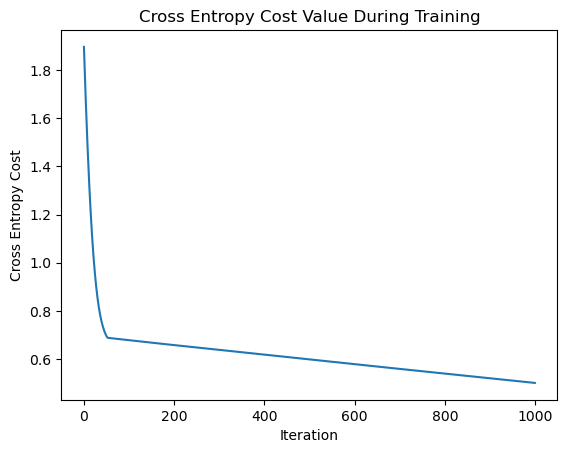


TRAINING METRICS
Train Accuracy: 0.9
Train ROC AUC SCORE: 1.0

TEST METRICS
Test Accuracy: 1.0
Test ROC AUC SCORE: 1.0


In [6]:
binary_dnn_model_results(model, X_train, Y_train, X_test, Y_test)

DNN Model predicts perfectly on iris test dataset

### Tensorflow Model

Tensorflow Model Results
GRADIENT DESCENT CHECK


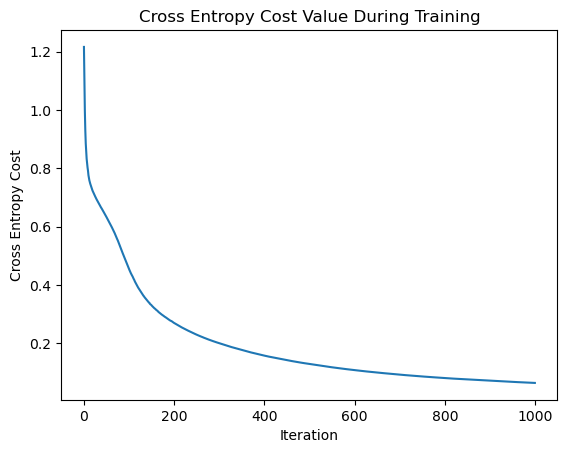


TRAINING METRICS
3/3 [==============================] - 0s 1ms/step
Train Accuracy: 1.0
Train ROC AUC SCORE: 1.0

TEST METRICS
1/1 [==============================] - 0s 17ms/step
Test Accuracy: 1.0
Test ROC AUC SCORE: 1.0


In [7]:
t_model = Sequential()

t_model.add(Dense(units=5, activation='relu', input_dim=X_train.T.shape[1]))
t_model.add(Dense(units=4, activation='relu'))
t_model.add(Dense(units=1, activation='sigmoid'))

t_model.compile(loss='binary_crossentropy', optimizer='sgd', metrics='accuracy')

history = t_model.fit(X_train.T, Y_train.T, epochs=1_000, batch_size=64, verbose=False)

#Evaluationg the model
binary_tenserflow_model_results(t_model, history, X_train.T, Y_train.T, X_test.T, Y_test.T)

## Breast Cancer Data

In [8]:
# Load data
data = datasets.load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize Data For Better Training and also for avoiding Zero Division Errors in the beggining of learning
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std  = std_scale.transform(X_test)

X_train_std = X_train_std.T
Y_train = Y_train.reshape(1,len(Y_train))
X_test_std = X_test_std.T
Y_test = Y_test.reshape(1,len(Y_test))

print(f"{X_train_std.shape} and {Y_train.shape}")
print(f"{X_test_std.shape} and {Y_test.shape}")

(30, 455) and (1, 455)
(30, 114) and (1, 114)


In [9]:
model = DNN()
model.train(X_train=X_train_std, Y_train=Y_train, layer_dims=[50, 30, 10, 1], epoch=5_000)

DNN Model Results
GRADIENT DESCENT CHECK


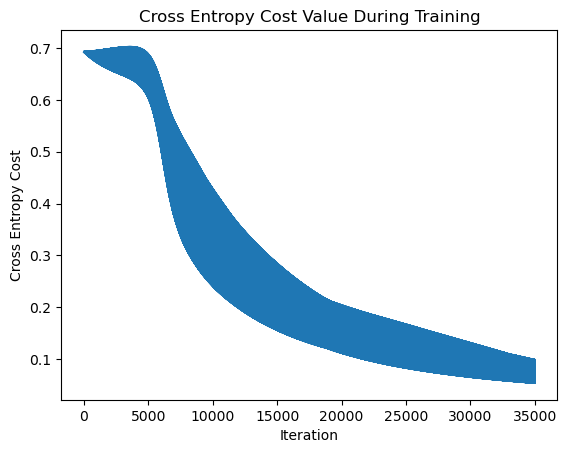


TRAINING METRICS
Train Accuracy: 0.9934065934065934
Train ROC AUC SCORE: 0.9994413870153515

TEST METRICS
Test Accuracy: 0.9736842105263158
Test ROC AUC SCORE: 0.9957418932197839


In [10]:
binary_dnn_model_results(model, X_train_std, Y_train, X_test_std, Y_test)

Our network also performs well on Breast Cancer Test Dataset

Tensorflow Model Results
GRADIENT DESCENT CHECK


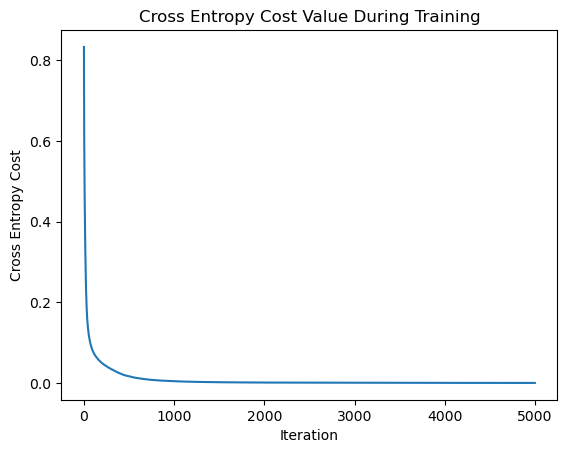


TRAINING METRICS
15/15 [==============================] - 0s 1ms/step
Train Accuracy: 1.0
Train ROC AUC SCORE: 1.0

TEST METRICS
4/4 [==============================] - 0s 897us/step
Test Accuracy: 0.9736842105263158
Test ROC AUC SCORE: 0.996069439895185


In [11]:
t_model = Sequential()

t_model.add(Dense(units=50, activation='relu', input_dim=X_train_std.T.shape[1]))
t_model.add(Dense(units=30, activation='relu'))
t_model.add(Dense(units=10, activation='relu'))
t_model.add(Dense(units=1, activation='sigmoid'))

t_model.compile(loss='binary_crossentropy', optimizer='sgd', metrics='accuracy')

history = t_model.fit(X_train_std.T, Y_train.T, epochs=5_000, batch_size=64, verbose=False)

#Evaluationg the model
binary_tenserflow_model_results(t_model, history, X_train_std.T, Y_train.T, X_test_std.T, Y_test.T)

## MNIST Dataset Test Only 0 and 1 Images

In [12]:
# load dataset
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

indices_0_1_train = np.where((Y_train == 0) | (Y_train == 1))
indices_0_1_test = np.where((Y_test == 0) | (Y_test == 1))

X_train = X_train[indices_0_1_train]
Y_train = Y_train[indices_0_1_train]

X_test = X_test[indices_0_1_test]
Y_test = Y_test[indices_0_1_test]

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Standardize Pixel values
X_train_std = X_train / 255.0
X_test_std  = X_test / 255.0

X_train_std = X_train_std.T
Y_train = Y_train.reshape(1,len(Y_train))
X_test_std = X_test_std.T
Y_test = Y_test.reshape(1,len(Y_test))

print(f"{X_train_std.shape} and {Y_train.shape}")
print(f"{X_test_std.shape} and {Y_test.shape}")

(784, 12665) and (1, 12665)
(784, 2115) and (1, 2115)


In [13]:
model = DNN()
model.train(X_train=X_train_std, Y_train=Y_train, layer_dims=[500, 200, 100, 10, 1], epoch=20)

DNN Model Results
GRADIENT DESCENT CHECK


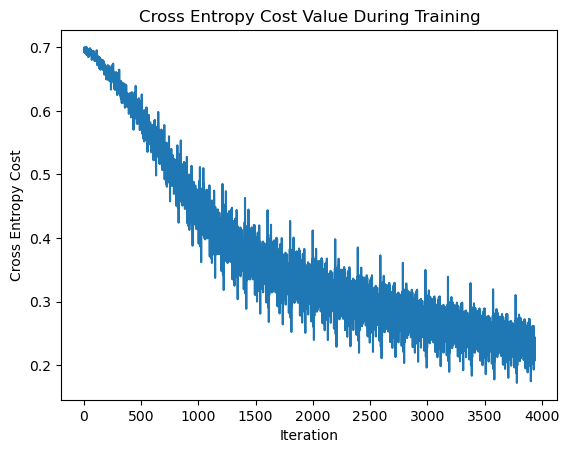


TRAINING METRICS
Train Accuracy: 0.9958941966048164
Train ROC AUC SCORE: 0.999973480490982

TEST METRICS
Test Accuracy: 0.9976359338061466
Test ROC AUC SCORE: 0.9999919086577362


In [14]:
binary_dnn_model_results(model, X_train_std, Y_train, X_test_std, Y_test)

The model also works well on image datasets

Tensorflow Model Results
GRADIENT DESCENT CHECK


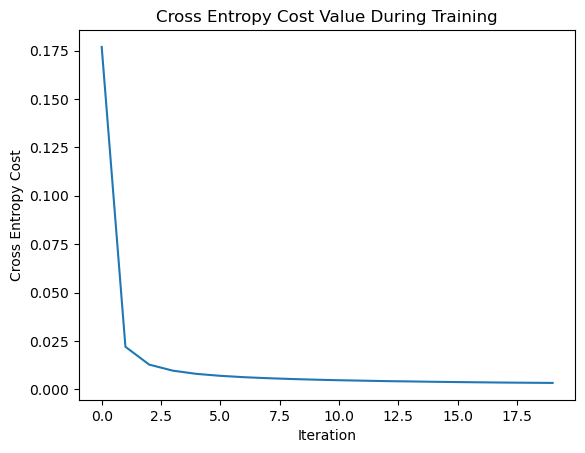


TRAINING METRICS
396/396 [==============================] - 0s 532us/step
Train Accuracy: 0.9989735491512041
Train ROC AUC SCORE: 0.9999957178129915

TEST METRICS
67/67 [==============================] - 0s 549us/step
Test Accuracy: 0.9995271867612293
Test ROC AUC SCORE: 0.999997302885912


In [15]:
t_model = Sequential()

t_model.add(Dense(units=50, activation='relu', input_dim=X_train_std.T.shape[1]))
t_model.add(Dense(units=30, activation='relu'))
t_model.add(Dense(units=10, activation='relu'))
t_model.add(Dense(units=1, activation='sigmoid'))

t_model.compile(loss='binary_crossentropy', optimizer='sgd', metrics='accuracy')

history = t_model.fit(X_train_std.T, Y_train.T, epochs=20, batch_size=64, verbose=False)

#Evaluationg the model
binary_tenserflow_model_results(t_model, history, X_train_std.T, Y_train.T, X_test_std.T, Y_test.T)

## MNIST Dataset Test - All Images

In [73]:
# Testing on MNIST
# load dataset
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Convert to one-hot encoding
Y_train_encoded = to_categorical(Y_train, num_classes=10)
Y_test_encoded = to_categorical(Y_test, num_classes=10)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Standardize Pixel values
X_train_std = X_train / 255.0
X_test_std  = X_test / 255.0

# Reshaping inputs for the our model
X_train_std = X_train_std.T
Y_train_encoded = Y_train_encoded.T
Y_train = Y_train.T
Y_train = Y_train.reshape(1,len(Y_train))

X_test_std = X_test_std.T
Y_test_encoded = Y_test_encoded.T
Y_test = Y_test.T
Y_test = Y_test.reshape(1,len(Y_test))

print(f"{X_train_std.shape} and {Y_train_encoded.shape}")
print(f"{X_test_std.shape} and {Y_test_encoded.shape}")

(784, 60000) and (10, 60000)
(784, 10000) and (10, 10000)


In [74]:
# DNN Model
model = DNN(binary_classification=False)
model.train(X_train=X_train_std, Y_train=Y_train_encoded, layer_dims=[1000, 500, 100, 20], minibatch_size=128, epoch=50)

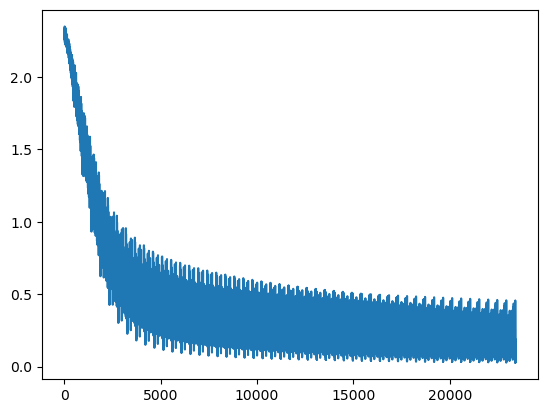

In [76]:
# DNN Model Loss Function Improvement Check
plt.plot(model.cost_during_training)

In [78]:
print("DNN Model Results")

preds = model.predict(X_train_std)
pred_labels = np.argmax(preds, axis=0, keepdims=True)
train_accuracy = np.sum(pred_labels == Y_train) / Y_train.shape[1]
print(f"Train Accuracy: {train_accuracy}")

preds = model.predict(X_test_std)
pred_labels = np.argmax(preds, axis=0, keepdims=True)
test_accuracy = np.sum(pred_labels == Y_test) / Y_test.shape[1]
print(f"Test Accuracy: {test_accuracy}")

DNN Model Results
Train Accuracy: 0.95315
Test Accuracy: 0.949


In [79]:
# Keras Model
t_model = Sequential()

t_model.add(Dense(units=1000, activation='relu', input_dim=X_train_std.T.shape[1]))
t_model.add(Dense(units=500, activation='relu'))
t_model.add(Dense(units=100, activation='relu'))
t_model.add(Dense(units=20, activation='relu'))
t_model.add(Dense(units=10, activation='softmax'))

t_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics='accuracy')

history = t_model.fit(X_train_std.T, Y_train_encoded.T, epochs=50, batch_size=128, verbose=False)

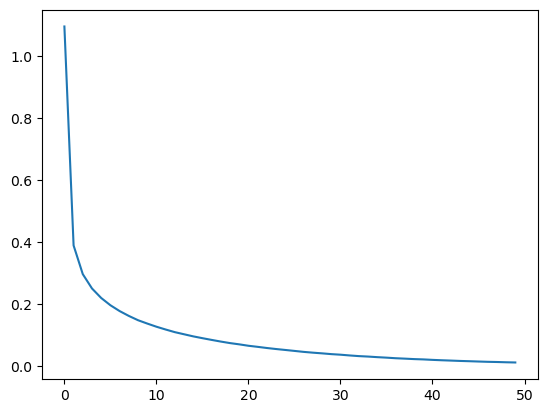

In [82]:
plt.plot(history.history['loss'])

In [83]:
print("Keras Model Results")

preds = t_model.predict(X_train_std.T)
pred_labels = np.argmax(preds, axis=1, keepdims=True)
train_accuracy = np.sum(pred_labels == Y_train.T) / Y_train.T.shape[0]
print(f"Train Accuracy: {train_accuracy}")

preds = t_model.predict(X_test_std.T)
pred_labels = np.argmax(preds, axis=1, keepdims=True)
test_accuracy = np.sum(pred_labels == Y_test.T) / Y_test.T.shape[0]
print(f"Test Accuracy: {test_accuracy}")

Keras Model Results
1875/1875 [==============================] - 5s 3ms/step
Train Accuracy: 0.9987833333333334
313/313 [==============================] - 1s 3ms/step
Test Accuracy: 0.9798
